***Problem statement :***
- Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

***Data Description :***
- Murder -- Muder rates in different places of United States
- Assualt- Assualt rate in different places of United States
- UrbanPop - urban population in different places of United States
- Rape - Rape rate in different places of United States


In [3]:
# Importing usefull libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import silhouette_score, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import the data
df = pd.read_csv('crime_data.csv')

In [5]:
# Showing only first 5 rows
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
# Describing the given dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [7]:
# Creating data for all clustering
df1 = df.drop(columns="Unnamed: 0")
df1.head(2)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5


# Hierarchical Clustering :

In [8]:
# Standardizing the given dataset
sc = StandardScaler()

x = pd.DataFrame(sc.fit_transform(df1), columns=df1.columns)
x

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


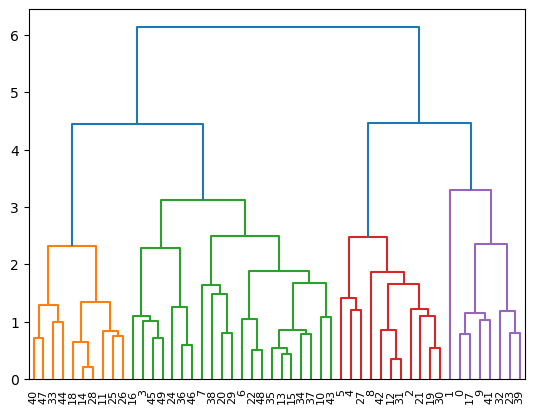

In [9]:
# Creating linkage & dendrogram
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)

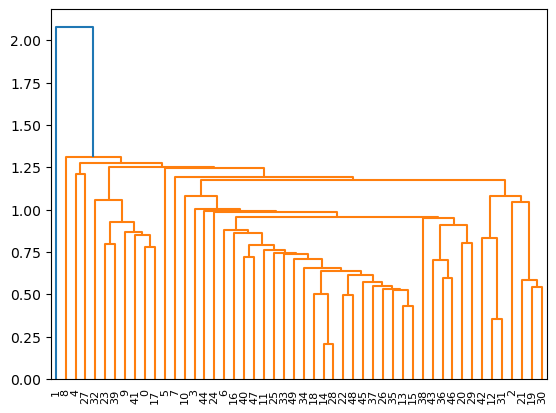

In [12]:

lk = hierarchy.linkage(x, method='single',metric='euclidean')
dendrogram = hierarchy.dendrogram(lk)

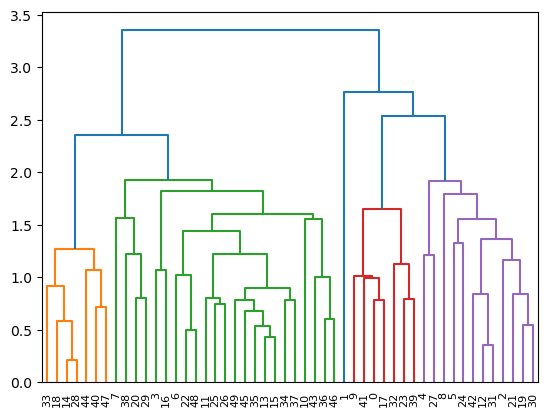

In [13]:
lk = hierarchy.linkage(x, method='average',metric='euclidean')
dendrogram = hierarchy.dendrogram(lk)

***Building heirarchical clustering model :***

In [8]:
hc = AgglomerativeClustering(n_clusters=4)
ylable = hc.fit_predict(x)
ylable

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [9]:
df1['HC_cluster'] = ylable

In [10]:
df1

,Murder,Assault,UrbanPop,Rape,HC_cluster
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


In [11]:
df1.groupby('HC_cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
HC_cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


In [12]:
# Accuracy of Hierarchical model
x = df1.iloc[:,:-1]
y = df1["HC_cluster"]

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.80      1.00      0.89         4
           2       0.50      0.50      0.50         2
           3       1.00      1.00      1.00         2

    accuracy                           0.77        13
   macro avg       0.76      0.78      0.76        13
weighted avg       0.77      0.77      0.76        13



# KMean Clustering :

In [13]:
km_data = df1.iloc[:,:-1]
x = km_data
x

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [14]:
# Feature scalling
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [15]:
km = KMeans()
cluster = km.fit_predict(x)
cluster

array([3, 7, 5, 0, 4, 4, 6, 6, 5, 3, 6, 2, 1, 0, 2, 0, 0, 3, 2, 5, 6, 5,
       0, 3, 1, 0, 0, 4, 2, 6, 5, 1, 3, 2, 0, 0, 0, 0, 6, 3, 2, 3, 1, 6,
       2, 0, 0, 2, 2, 0])

In [16]:
# within cluster sum of squares
wcss = []

for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [17]:
wcss

[199.99999999999997,
 104.96163315756871,
 80.08569526137276,
 57.66757825000803,
 49.94594570974446,
 44.69533955400429,
 39.31939718304052,
 36.47631127682171,
 31.522562332714717,
 28.63209006441948,
 25.18188297084909,
 22.593361865132323,
 21.314807237923606,
 20.434076505090175,
 18.512419030461356,
 17.371690501523247,
 15.221497533243467,
 15.065222775538293,
 13.455922729251121]

***Elbow graph :***

Text(0, 0.5, 'WCSS')

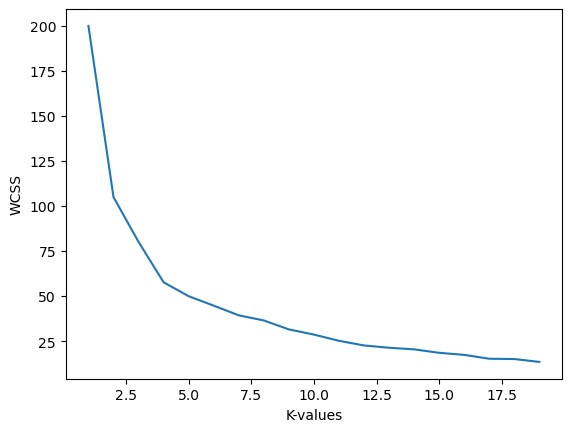

In [18]:
plt.plot(range(1,20), wcss)
plt.xlabel('K-values')
plt.ylabel('WCSS')

***Model building with K=5***

In [19]:
km = KMeans(n_clusters=5)
ylabel1 = km.fit_predict(x)
ylabel1

array([0, 4, 4, 3, 4, 4, 2, 2, 4, 0, 2, 1, 4, 3, 1, 3, 3, 0, 1, 4, 2, 4,
       1, 0, 3, 1, 1, 4, 1, 2, 4, 4, 0, 1, 3, 3, 3, 2, 2, 0, 1, 0, 4, 2,
       1, 3, 3, 1, 1, 3])

In [20]:
# Checking centers of created KMean clusters
km.cluster_centers_

array([[ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-1.08919812, -1.14860501, -0.93910247, -1.01363413],
       [-0.66980002, -0.40012085,  1.05273922, -0.56022015],
       [-0.14480567, -0.31003829, -0.07575078,  0.02596213],
       [ 0.73721295,  1.13018079,  0.76486721,  1.33477166]])

In [21]:
# Adding created KMean clusters in given dataset
km_data["KM_cluster"] = ylabel1
km_data

,Murder,Assault,UrbanPop,Rape,KM_cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,4
2,8.1,294,80,31.0,4
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,4
5,7.9,204,78,38.7,4
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,4
9,17.4,211,60,25.8,0


In [22]:
# Total created KMean clusters & their means
km_data.groupby('KM_cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
KM_cluster,,,,
0,14.671429,251.285714,54.285714,21.685714
1,3.091667,76.000000,52.083333,11.833333
2,4.900000,137.750000,80.625000,16.037500
3,7.163636,145.181818,64.454545,21.472727
4,10.966667,264.000000,76.500000,33.608333


In [23]:
# Adding created KMean clusters in given dataset
df1["KM_cluster"] = ylabel1
df1

,Murder,Assault,UrbanPop,Rape,HC_cluster,KM_cluster
0,13.2,236,58,21.2,3,0
1,10.0,263,48,44.5,1,4
2,8.1,294,80,31.0,1,4
3,8.8,190,50,19.5,0,3
4,9.0,276,91,40.6,1,4
5,7.9,204,78,38.7,1,4
6,3.3,110,77,11.1,0,2
7,5.9,238,72,15.8,0,2
8,15.4,335,80,31.9,1,4
9,17.4,211,60,25.8,3,0


# DBSCAN :
***[Density Based Spatial Clustering Application with Noise]***

In [24]:
db_data = df1.iloc[:,:-2]

x = df1.iloc[:,:-2]
x

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [25]:
# Describing given dataset
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [26]:
# Feature scalling
x = sc.fit_transform(x)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

***DBSCAN model building :***

In [27]:
db = DBSCAN()
db.fit_predict(x)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [28]:
db = DBSCAN(eps=2, min_samples=3)

y = db.fit_predict(x)

In [29]:
# Model evaluation
silhouette_score(x, db.fit_predict(x))

0.23455598753159795

In [32]:
# Adding created DBSCAN clusters in given dataset
db_data['DB_cluster'] = y
db_data

,Murder,Assault,UrbanPop,Rape,DB_cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [33]:
# Total created DBSCAN clusters & their means
db_data.groupby('DB_cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
DB_cluster,,,,
-1,10.000000,263.000000,48.000000,44.500000
0,7.742857,168.877551,65.897959,20.757143


In [35]:
# Adding created DBSCAN clusters in given dataset
df1['DB_cluster'] = y
df1

,Murder,Assault,UrbanPop,Rape,HC_cluster,KM_cluster,DB_cluster
0,13.2,236,58,21.2,3,0,0
1,10.0,263,48,44.5,1,4,-1
2,8.1,294,80,31.0,1,4,0
3,8.8,190,50,19.5,0,3,0
4,9.0,276,91,40.6,1,4,0
5,7.9,204,78,38.7,1,4,0
6,3.3,110,77,11.1,0,2,0
7,5.9,238,72,15.8,0,2,0
8,15.4,335,80,31.9,1,4,0
9,17.4,211,60,25.8,3,0,0


In [37]:
# All created clusters & their means
df1.groupby(['HC_cluster','KM_cluster','DB_cluster']).agg('mean')

Murder     Assault   UrbanPop       Rape
HC_cluster KM_cluster DB_cluster                                             
0          2           0           4.900000  137.750000  80.625000  16.037500
           3           0           7.163636  145.181818  64.454545  21.472727
1          4          -1          10.000000  263.000000  48.000000  44.500000
                       0          11.054545  264.090909  79.090909  32.618182
2          1           0           3.091667   76.000000  52.083333  11.833333
3          0           0          14.671429  251.285714  54.285714  21.685714

# Inference :
- 4 Hierarchical clusters obtained from given crime dataset.
- 5 KMeans clusters obtained from given crime dataset.
- 2 DBSCAN clusters obtained from given crime dataset.